### Import libraries

In [31]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### Import and read data

In [10]:
train = pd.read_csv(r"C:\Users\udea3\OneDrive\Masaüstü\titanic\train.csv")
test = pd.read_csv(r"C:\Users\udea3\OneDrive\Masaüstü\titanic\test.csv")
gender_submission = pd.read_csv(r"C:\Users\udea3\OneDrive\Masaüstü\titanic\gender_submission.csv")

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.shape

(891, 12)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
test.shape

(418, 11)

In [14]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

 - Survived: 0 = Did not survive, 1 = Survived

 - Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

 - Sex: Male or female

 - Age: Age in years, fractional if less than 1

 - SibSp: Number of siblings or spouses aboard the titanic

 - Parch: Number of parents or children aboard the titanic

 - Ticket: Passenger ticket number

 - Fare: Passenger fare

 - Cabin: Cabin number

 - Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

### Exploratory Data Analysis (EDA)

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [40]:
import missingno as msno

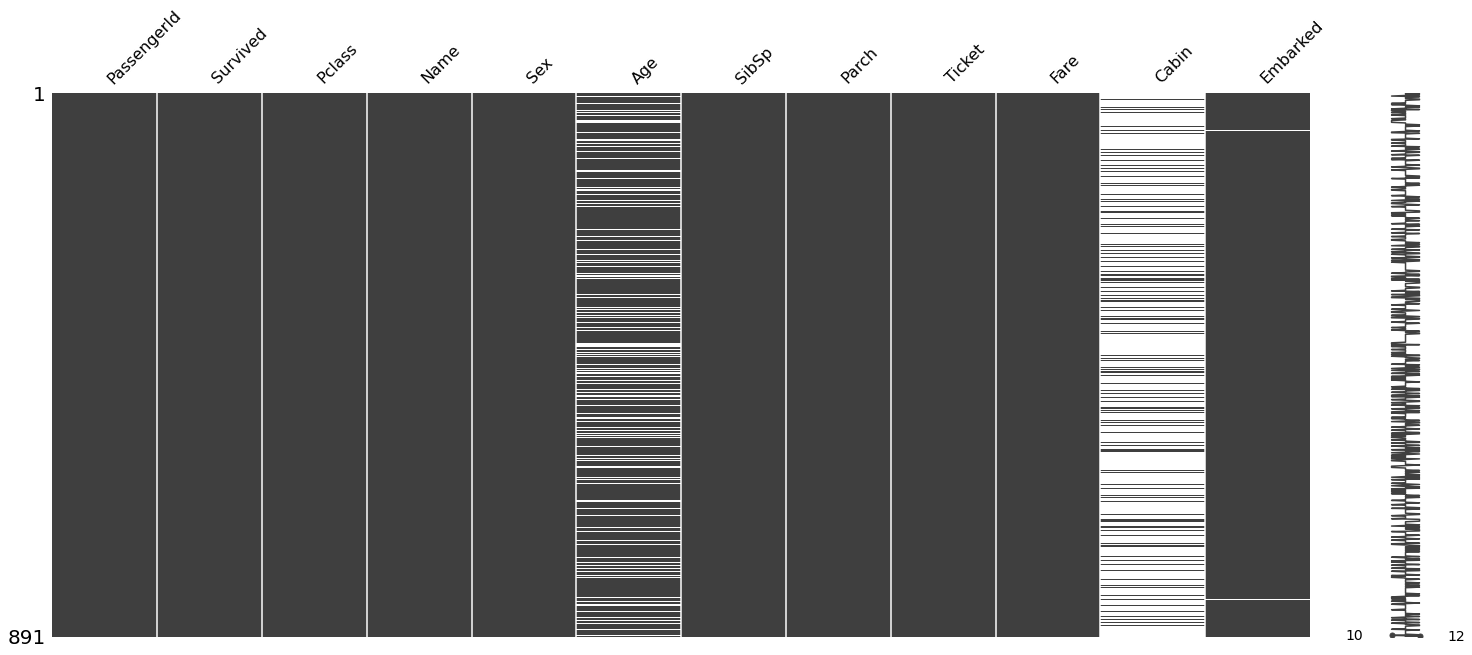

In [42]:
msno.matrix(train);

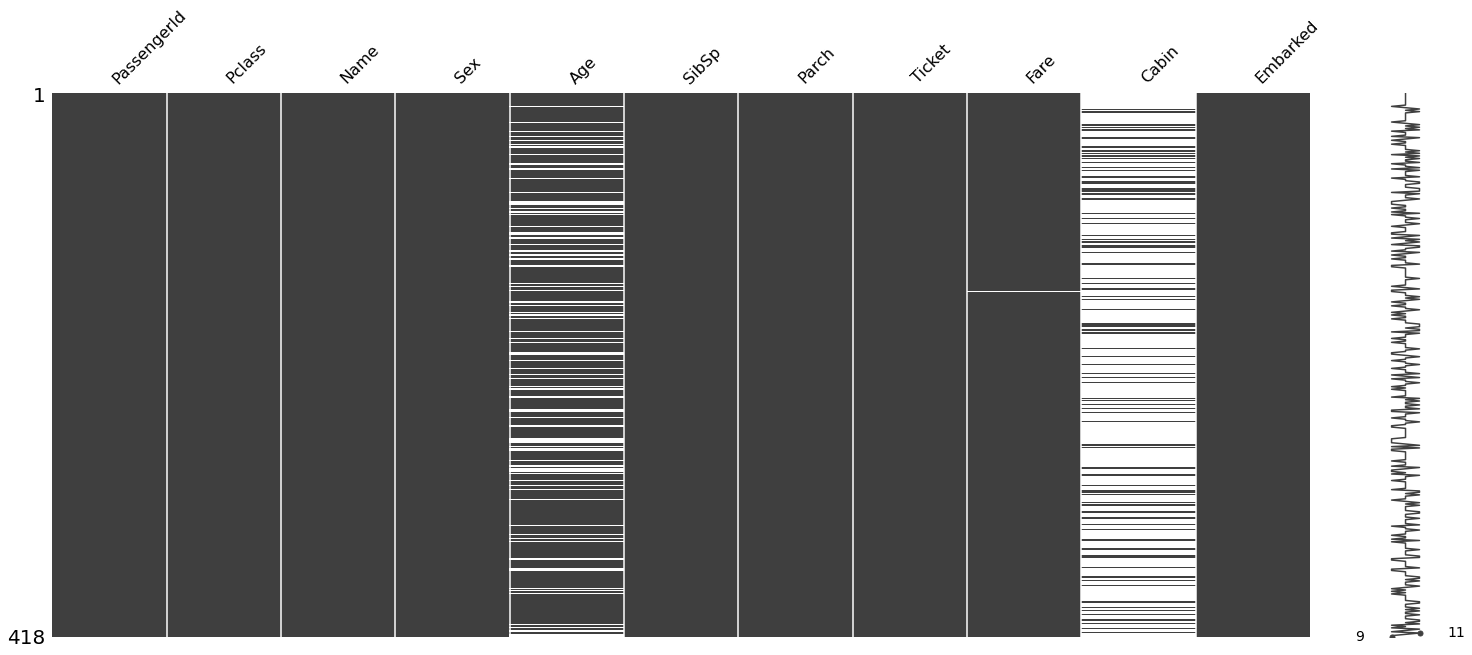

In [43]:
msno.matrix(test);

In [44]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature analysis

#### Sex vs Survive

In [48]:
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [60]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


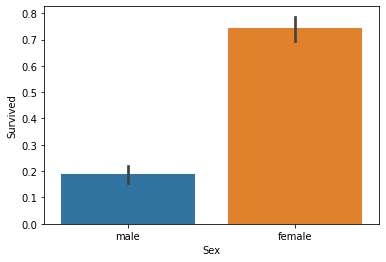

In [64]:
sns.barplot(x = 'Sex', y ='Survived', data = train);

#### Pclass vs Survive

In [65]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


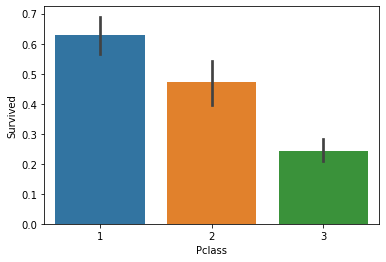

In [66]:
sns.barplot(x = 'Pclass', y ='Survived', data = train);

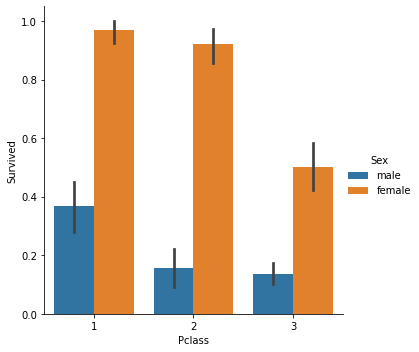

In [72]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar');

#### Embarked vs Survive

In [73]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


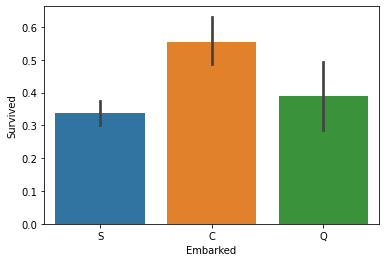

In [75]:
sns.barplot(x = 'Embarked', y ='Survived', data = train);

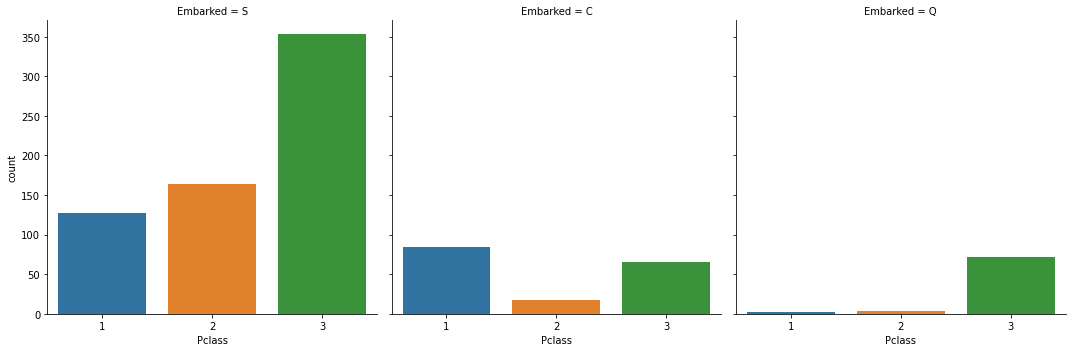

In [76]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count');

### detect outliers

In [ ]:
def detect_outliers(df, n, features):
     outlier_indices = [] 
    for i in features: 
        Q1 = np.percentile(df[i], 25)
        Q3 = np.percentile(df[i], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

#### Sibsp vs Survive

In [78]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000
